<a href="https://colab.research.google.com/github/workitoutsilas/DDoS-Attack-Detection-WebApp/blob/main/Final_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Libraries**

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ML libraries
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler

# Modeling libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Model evaluation metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# For saving model
import os
import pickle

**Just one file out of entire dataset (169 files)**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

# Import dataset
filePath = '/content/gdrive/MyDrive/CICIoT2023_DATASET/New-file-manual-data-split/part-00000-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv'
df_path = pd.read_csv(filePath)
df_path.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,54.00,6.00,64.00,0.329807,0.329807,0.0,1.0,0.0,1.0,...,0.000000,54.00,8.334383e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-RSTFINFlood
1,0.000000,57.04,6.33,64.00,4.290556,4.290556,0.0,0.0,0.0,0.0,...,2.822973,57.04,8.292607e+07,9.5,10.464666,4.010353,160.987842,0.05,141.55,DoS-TCP_Flood
2,0.000000,0.00,1.00,64.00,33.396799,33.396799,0.0,0.0,0.0,0.0,...,0.000000,42.00,8.312799e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
3,0.328175,76175.00,17.00,64.00,4642.133010,4642.133010,0.0,0.0,0.0,0.0,...,0.000000,50.00,8.301570e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DoS-UDP_Flood
4,0.117320,101.73,6.11,65.91,6.202211,6.202211,0.0,0.0,1.0,0.0,...,23.113111,57.88,8.297300e+07,9.5,11.346876,32.716243,3016.808286,0.19,141.55,DoS-SYN_Flood


In [ ]:
df_path['label'].value_counts()

,count
label,
DDoS-ICMP_Flood,36554
DDoS-UDP_Flood,27626
DDoS-TCP_Flood,23149
DDoS-PSHACK_Flood,21210
DDoS-SYN_Flood,20739
DDoS-RSTFINFlood,20669
DDoS-SynonymousIP_Flood,18189
DoS-UDP_Flood,16957
DoS-TCP_Flood,13630


In [ ]:
df_path.shape

(238687, 47)

**Classes to work with**

In [ ]:
# Classes to work with
select_classes = ['BenignTraffic','DDoS-ICMP_Flood','DDoS-UDP_Flood','DDoS-TCP_Flood','DDoS-PSHACK_Flood','DDoS-SYN_Flood','DDoS-RSTFINFlood','DDoS-SynonymousIP_Flood','DDoS-ICMP_Fragmentation','DDoS-UDP_Fragmentation','DDoS-ACK_Fragmentation','DDoS-UDP_Fragmentation','DDoS-HTTP_Flood','DDoS-SlowLoris']

In [ ]:
selected_data = df_path[df_path['label'].isin(select_classes)]
selected_data['label'].value_counts()

,count
label,
DDoS-ICMP_Flood,36554
DDoS-UDP_Flood,27626
DDoS-TCP_Flood,23149
DDoS-PSHACK_Flood,21210
DDoS-SYN_Flood,20739
DDoS-RSTFINFlood,20669
DDoS-SynonymousIP_Flood,18189
BenignTraffic,5600
DDoS-ICMP_Fragmentation,2377


In [ ]:
selected_data.reset_index(drop=True, inplace=True)

In [ ]:
# Save new dataframe into a new file
selected_data.to_csv('/content/gdrive/MyDrive/CICIoT2023_DATASET/All-forty-files/Final_Folder/final.csv', index=False)

In [ ]:
# Read file
read_File = '/content/gdrive/MyDrive/CICIoT2023_DATASET/All-forty-files/Final_Folder/final.csv'
df = pd.read_csv(read_File)

In [ ]:
df.shape

(179377, 47)

**Benign File**

In [ ]:
# BenignTraffic file
Benign = ['BenignTraffic']
df_Benign = df[df['label'].isin(Benign)]

In [ ]:
df_Benign.reset_index(drop=True, inplace=True)

In [ ]:
# Save new benignTraffic file
df_Benign.to_csv('/content/gdrive/MyDrive/CICIoT2023_DATASET/All-forty-files/Final_Folder/final_benign.csv', index=False)

In [ ]:
df_Benign['label'].value_counts()

,count
label,
BenignTraffic,5600


In [ ]:
df_Benign.shape

(5600, 47)

**DDoS File**

In [ ]:
# DDoS file
DDoS = ['DDoS-ICMP_Flood','DDoS-UDP_Flood','DDoS-TCP_Flood','DDoS-PSHACK_Flood','DDoS-SYN_Flood','DDoS-RSTFINFlood','DDoS-SynonymousIP_Flood','DDoS-ICMP_Fragmentation','DDoS-UDP_Fragmentation','DDoS-ACK_Fragmentation','DDoS-UDP_Fragmentation','DDoS-HTTP_Flood','DDoS-SlowLoris']
DDoS = df[df['label'].isin(DDoS)]

In [ ]:
DDoS.reset_index(drop=True, inplace=True)

In [ ]:
DDoS['label'].value_counts()

,count
label,
DDoS-ICMP_Flood,36554
DDoS-UDP_Flood,27626
DDoS-TCP_Flood,23149
DDoS-PSHACK_Flood,21210
DDoS-SYN_Flood,20739
DDoS-RSTFINFlood,20669
DDoS-SynonymousIP_Flood,18189
DDoS-ICMP_Fragmentation,2377
DDoS-ACK_Fragmentation,1505


In [ ]:
# Save new DDoS file
DDoS.to_csv('/content/gdrive/MyDrive/CICIoT2023_DATASET/All-forty-files/Final_Folder/final_malicious.csv', index=False)

In [ ]:
ddos_path = '/content/gdrive/MyDrive/CICIoT2023_DATASET/All-forty-files/Final_Folder/final_malicious.csv'
df_copy_new = pd.read_csv(ddos_path)

In [ ]:
df_copy_new['label'].value_counts()

,count
label,
DDoS-ICMP_Flood,36554
DDoS-UDP_Flood,27626
DDoS-TCP_Flood,23149
DDoS-PSHACK_Flood,21210
DDoS-SYN_Flood,20739
DDoS-RSTFINFlood,20669
DDoS-SynonymousIP_Flood,18189
DDoS-ICMP_Fragmentation,2377
DDoS-ACK_Fragmentation,1505


In [ ]:
df_copy_new.shape

(173777, 47)

In [ ]:
df_copy = df_copy_new.copy()

#**One with the balancing technique**

**Random undersampling**

In [ ]:
# Classes with categorical names
samples_per_class = {
    'DDoS-ICMP_Flood' : 1500, #1325 #125
    'DDoS-UDP_Flood' :  1200, #1525 #25
    'DDoS-TCP_Flood' :  1000, #1739 #39
    'DDoS-PSHACK_Flood' : 500, #1739 #39
    'DDoS-SynonymousIP_Flood' : 50, #1739 #39
    'DDoS-RSTFINFlood' : 50, #1739 #39
    'DDoS-SYN_Flood'  : 1200, #1739 #39
    'DDoS-HTTP_Flood' : 50, #1739 #39
    'DDoS-SlowLoris'  : 50, #1739 #39
    'DDoS-ICMP_Fragmentation' : 50, #1739 #39
    'DDoS-UDP_Fragmentation' : 50, #1739 #39
    'DDoS-ACK_Fragmentation' : 50, #1739 #39
}

# Create an empty DataFrame to hold the samples
df_sampled = pd.DataFrame()

# Loop through each class and sample the specified number of rows
for class_label, n_samples in samples_per_class.items():
    class_subset = df_copy[df_copy['label'] == class_label]
    sampled_subset = class_subset.sample(n=n_samples, random_state=42)
    df_sampled = pd.concat([df_sampled, sampled_subset], axis=0)

# Get the classes that were not specified in samples_per_class
remaining_classes = df_copy[~df_copy['label'].isin(samples_per_class.keys())]

# Combine the sampled rows with the remaining rows from the original DataFrame
df_combined = pd.concat([df_sampled, remaining_classes], axis=0).reset_index(drop=True)

In [ ]:
df_combined['label'].value_counts()

,count
label,
DDoS-ICMP_Flood,1500
DDoS-UDP_Flood,1200
DDoS-SYN_Flood,1200
DDoS-TCP_Flood,1000
DDoS-PSHACK_Flood,500
DDoS-SynonymousIP_Flood,50
DDoS-RSTFINFlood,50
DDoS-HTTP_Flood,50
DDoS-SlowLoris,50


In [ ]:
# Combine the sampled rows with the remaining rows from the original DataFrame
df_balanced = pd.concat([df_combined, df_Benign], axis=0).reset_index(drop=True)

In [ ]:
df_balanced.head(n=1000)

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,0.00,1.00,64.0,22.205758,22.205758,0.0,0.0,0.0,0.0,...,0.000000,42.00,8.348327e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
1,0.000000,0.00,1.00,64.0,21.750909,21.750909,0.0,0.0,0.0,0.0,...,0.000000,42.00,8.314940e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
2,0.000000,0.00,1.00,64.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,42.00,8.315070e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
3,0.000000,0.00,1.00,64.0,12.644338,12.644338,0.0,0.0,0.0,0.0,...,0.000000,42.00,8.312816e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
4,0.000000,0.00,1.00,64.0,24.595600,24.595600,0.0,0.0,0.0,0.0,...,0.000000,42.00,8.315372e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.000000,0.00,1.00,64.0,26.208257,26.208257,0.0,0.0,0.0,0.0,...,0.000000,42.00,8.312803e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
996,0.017172,6.22,1.32,64.0,9.421548,9.421548,0.0,0.0,0.0,0.0,...,0.875287,42.96,8.312876e+07,9.5,9.197232,1.242521,12.960796,0.06,141.55,DDoS-ICMP_Flood
997,0.000000,0.00,1.00,64.0,7.447749,7.447749,0.0,0.0,0.0,0.0,...,0.000000,42.00,8.312798e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
998,0.000000,0.00,1.00,64.0,1.008073,1.008073,0.0,0.0,0.0,0.0,...,0.000000,42.00,8.313229e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood


In [ ]:
df_balanced['label'] = df_balanced['label'].apply(lambda x: 0 if x in ['DDoS-ICMP_Flood','DDoS-UDP_Flood','DDoS-TCP_Flood','DDoS-PSHACK_Flood','DDoS-SYN_Flood','DDoS-RSTFINFlood','DDoS-SynonymousIP_Flood','DDoS-ICMP_Fragmentation','DDoS-UDP_Fragmentation','DDoS-ACK_Fragmentation','DDoS-UDP_Fragmentation','DDoS-HTTP_Flood','DDoS-SlowLoris'] else 1)
df_balanced['label'].value_counts()

,count
label,
0,5750
1,5600


In [ ]:
df_balanced.shape

(11350, 47)

<ipython-input-127-e954d0aacaef>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df_balanced, palette=pal)
<ipython-input-127-e954d0aacaef>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='label', data=df_balanced, palette=pal)


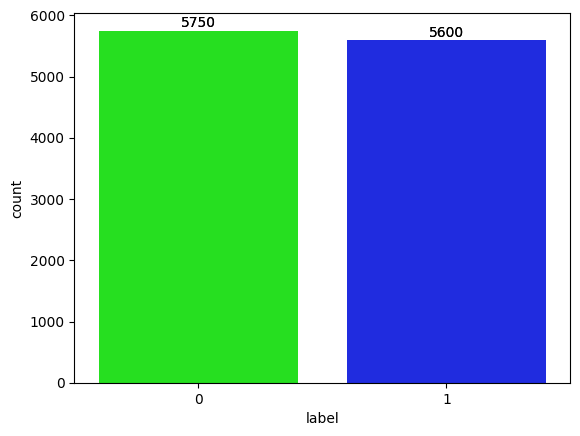

In [ ]:
pal = sns.color_palette("hsv", 2)
sns.countplot(x='label', data=df_balanced, palette=pal)
ax = sns.countplot(x='label', data=df_balanced, palette=pal)

# Annotate each bar with its value
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.001 * height,
            f'{int(height)}', ha='center', va='bottom', fontsize=10, color='black')

plt.show()

In [ ]:
# Getting the proportion of the two classes
df_balanced["label"].value_counts(normalize=True)

,proportion
label,
0,0.506608
1,0.493392


In [ ]:
df_balanced.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.0,0.0,1.0,64.0,22.205758,22.205758,0.0,0.0,0.0,0.0,...,0.0,42.0,8.348327e+07,9.5,9.165151,0.0,0.0,0.0,141.55,0
1,0.0,0.0,1.0,64.0,21.750909,21.750909,0.0,0.0,0.0,0.0,...,0.0,42.0,8.314940e+07,9.5,9.165151,0.0,0.0,0.0,141.55,0
2,0.0,0.0,1.0,64.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,42.0,8.315070e+07,9.5,9.165151,0.0,0.0,0.0,141.55,0
3,0.0,0.0,1.0,64.0,12.644338,12.644338,0.0,0.0,0.0,0.0,...,0.0,42.0,8.312816e+07,9.5,9.165151,0.0,0.0,0.0,141.55,0
4,0.0,0.0,1.0,64.0,24.595600,24.595600,0.0,0.0,0.0,0.0,...,0.0,42.0,8.315372e+07,9.5,9.165151,0.0,0.0,0.0,141.55,0


In [ ]:
# Checking for duplicates
df_balanced.duplicated().any()
# df_main.duplicated().sum()

False

In [ ]:
# Checking for missing values per column
missing_values = df_balanced.isnull().sum()
missing_values

,0
flow_duration,0
Header_Length,0
Protocol Type,0
Duration,0
Rate,0
Srate,0
Drate,0
fin_flag_number,0
syn_flag_number,0
rst_flag_number,0


In [ ]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11350 entries, 0 to 11349
Data columns (total 47 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   flow_duration    11350 non-null  float64
 1   Header_Length    11350 non-null  float64
 2   Protocol Type    11350 non-null  float64
 3   Duration         11350 non-null  float64
 4   Rate             11350 non-null  float64
 5   Srate            11350 non-null  float64
 6   Drate            11350 non-null  float64
 7   fin_flag_number  11350 non-null  float64
 8   syn_flag_number  11350 non-null  float64
 9   rst_flag_number  11350 non-null  float64
 10  psh_flag_number  11350 non-null  float64
 11  ack_flag_number  11350 non-null  float64
 12  ece_flag_number  11350 non-null  float64
 13  cwr_flag_number  11350 non-null  float64
 14  ack_count        11350 non-null  float64
 15  syn_count        11350 non-null  float64
 16  fin_count        11350 non-null  float64
 17  urg_count   

In [ ]:
df_balanced.shape

(11350, 47)

**Drop statistical features**

In [ ]:
# List of features to drop
features_to_drop = ['Min', 'Max', 'Std', 'Variance', 'Covariance', 'Weight', 'AVG', 'Magnitue', 'Radius']

# Drop the specified features
df_balanced = df_balanced.drop(columns=features_to_drop)

In [ ]:
df_balanced.shape

(11350, 38)

In [ ]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11350 entries, 0 to 11349
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   flow_duration    11350 non-null  float64
 1   Header_Length    11350 non-null  float64
 2   Protocol Type    11350 non-null  float64
 3   Duration         11350 non-null  float64
 4   Rate             11350 non-null  float64
 5   Srate            11350 non-null  float64
 6   Drate            11350 non-null  float64
 7   fin_flag_number  11350 non-null  float64
 8   syn_flag_number  11350 non-null  float64
 9   rst_flag_number  11350 non-null  float64
 10  psh_flag_number  11350 non-null  float64
 11  ack_flag_number  11350 non-null  float64
 12  ece_flag_number  11350 non-null  float64
 13  cwr_flag_number  11350 non-null  float64
 14  ack_count        11350 non-null  float64
 15  syn_count        11350 non-null  float64
 16  fin_count        11350 non-null  float64
 17  urg_count   

In [ ]:
# Features and Label
X = df_balanced.drop(columns=['label'])
y = df_balanced['label']


X_train, X_remaining, y_train, y_remaining = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y
)

In [ ]:
X_train.shape, X_remaining.shape

((9080, 37), (2270, 37))

In [ ]:
y_train.shape, y_remaining.shape

((9080,), (2270,))

In [ ]:
df_balanced.shape

(11350, 38)

In [ ]:
y_train.value_counts(normalize=True)

,proportion
label,
0,0.506608
1,0.493392


In [ ]:
y_remaining.value_counts(normalize=True)

,proportion
label,
0,0.506608
1,0.493392


**Feature Selection**

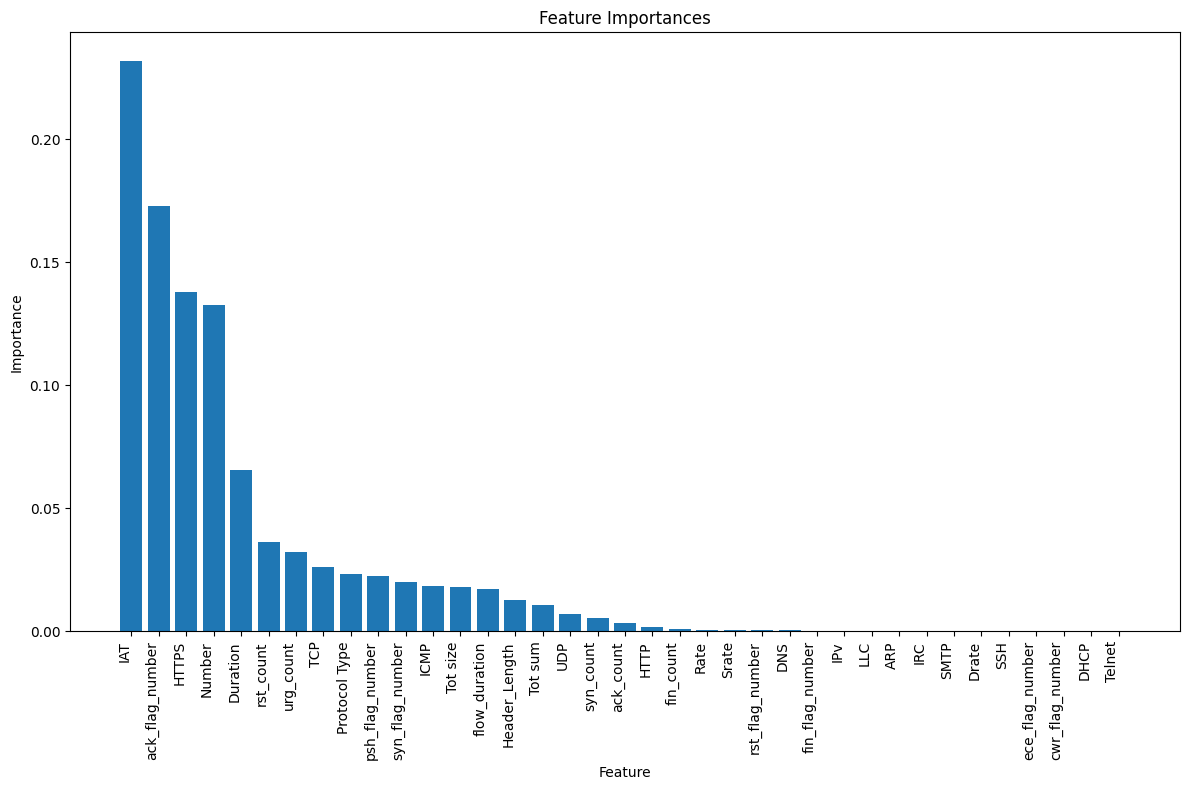

In [ ]:
# Train the ExtraTreesClassifier to get feature importances
clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
importances = clf.feature_importances_

# Plot the feature importances
feature_names = X.columns
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90, ha='right')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

In [ ]:
# Print the feature importances for manual selection
print("Feature importances:")
for i in indices:
    print(f"{feature_names[i]}: {importances[i]}")

# Function to get top N features
def get_top_n_features(X, importances, n):
    indices = np.argsort(importances)[::-1][:n]
    top_features = [X.columns[i] for i in indices]
    return top_features

Feature importances:
IAT: 0.2317621063444911
ack_flag_number: 0.17287211222390078
HTTPS: 0.13788332917059698
Number: 0.13268011375072278
Duration: 0.06562009969812058
rst_count: 0.03641112146261843
urg_count: 0.03228705150997539
TCP: 0.026023120949132606
Protocol Type: 0.023157981000206936
psh_flag_number: 0.022594168583071058
syn_flag_number: 0.020159130881401824
ICMP: 0.018331551700314978
Tot size: 0.01792233198181665
flow_duration: 0.017193143757981165
Header_Length: 0.012973652887744127
Tot sum: 0.010750837796177274
UDP: 0.0070182121121260144
syn_count: 0.005519278398270517
ack_count: 0.0032612712509260387
HTTP: 0.0019903652639732938
fin_count: 0.0008481184573826772
Rate: 0.0006768662953435113
Srate: 0.0005485539051660373
rst_flag_number: 0.0004623466994932299
DNS: 0.0004010365494833856
fin_flag_number: 0.0003779566754584237
IPv: 0.000157323598401473
LLC: 9.814780050846371e-05
ARP: 1.8669295194339235e-05
IRC: 0.0
SMTP: 0.0
Drate: 0.0
SSH: 0.0
ece_flag_number: 0.0
cwr_flag_number: 0

In [ ]:
# Example usage: select top 5 features
top_n = 25
top_features = get_top_n_features(X, importances, top_n)
print(f"\nTop {top_n} features:")
print(top_features)


Top 25 features:
['IAT', 'ack_flag_number', 'HTTPS', 'Number', 'Duration', 'rst_count', 'urg_count', 'TCP', 'Protocol Type', 'psh_flag_number', 'syn_flag_number', 'ICMP', 'Tot size', 'flow_duration', 'Header_Length', 'Tot sum', 'UDP', 'syn_count', 'ack_count', 'HTTP', 'fin_count', 'Rate', 'Srate', 'rst_flag_number', 'DNS']


In [ ]:
X_train = X_train[top_features]
X_remaining = X_remaining[top_features]

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9080 entries, 3380 to 298
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IAT              9080 non-null   float64
 1   ack_flag_number  9080 non-null   float64
 2   HTTPS            9080 non-null   float64
 3   Number           9080 non-null   float64
 4   Duration         9080 non-null   float64
 5   rst_count        9080 non-null   float64
 6   urg_count        9080 non-null   float64
 7   TCP              9080 non-null   float64
 8   Protocol Type    9080 non-null   float64
 9   psh_flag_number  9080 non-null   float64
 10  syn_flag_number  9080 non-null   float64
 11  ICMP             9080 non-null   float64
 12  Tot size         9080 non-null   float64
 13  flow_duration    9080 non-null   float64
 14  Header_Length    9080 non-null   float64
 15  Tot sum          9080 non-null   float64
 16  UDP              9080 non-null   float64
 17  syn_count        

In [ ]:
# Apply SMOTE to the training data
# smote = SMOTE(random_state=42)
# X_train, y_train = smote.fit_resample(X_train, y_train)

**Scaling**

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_remaining_scaled = scaler.transform(X_remaining)

In [ ]:
print(pd.DataFrame(X_train_scaled).head())

         0         1         2         3         4         5         6   \
0  0.001216 -0.943030 -0.755422  0.003641 -0.577490 -0.525125 -0.444147   
1  0.002175 -0.943030 -0.755422  0.003641 -0.577490 -0.525125 -0.444147   
2 -1.419074  1.060412 -0.755422 -1.419272 -0.479939 -0.225583  0.592111   
3  0.001754 -0.943030 -0.755422  0.003641 -0.577490 -0.525125 -0.444147   
4  0.001154 -0.943030 -0.755422  0.003641 -0.562971 -0.525125 -0.444147   

         7         8         9   ...        15        16        17        18  \
0  0.693714 -0.291076 -0.231536  ... -0.487478 -0.403805 -0.751238 -0.230313   
1 -1.441515 -1.448164 -0.231536  ... -0.507886 -0.403805 -0.751238 -0.230313   
2  0.693714  0.218043 -0.231536  ... -0.465272 -0.403805  0.939822 -0.230313   
3 -1.441515  2.254518 -0.231536  ... -0.494281  2.476440 -0.751238 -0.230313   
4  0.693714 -0.277191 -0.231536  ... -0.482626 -0.403805 -0.751238 -0.230313   

         19        20        21        22        23        24  
0 -0

In [ ]:
scaler.get_feature_names_out()

array(['IAT', 'ack_flag_number', 'HTTPS', 'Number', 'Duration',
       'rst_count', 'urg_count', 'TCP', 'Protocol Type',
       'psh_flag_number', 'syn_flag_number', 'ICMP', 'Tot size',
       'flow_duration', 'Header_Length', 'Tot sum', 'UDP', 'syn_count',
       'ack_count', 'HTTP', 'fin_count', 'Rate', 'Srate',
       'rst_flag_number', 'DNS'], dtype=object)

In [ ]:
# save scaler Model
with open('/content/gdrive/MyDrive/CICIoT2023_DATASET/All-forty-files/Final_Folder/Models/scaler.pkl', "wb") as file:
  pickle.dump(scaler, file)

In [ ]:
# SVC?

In [ ]:
svc_model = SVC(probability=True)
svc_model.fit(X_train_scaled,y_train)

SVC(probability=True)

**Evaluation on validation set** [link text](https://)

In [ ]:
# Evaluate the models on the validation set
svc_pred_val = svc_model.predict(X_remaining_scaled)

In [ ]:
# Print out the evaluation metrics for validation set
accuracy_s = accuracy_score(y_remaining, svc_pred_val)
recall_score_s = recall_score(y_remaining, svc_pred_val)
precision_s = precision_score(y_remaining, svc_pred_val)
f1_s = f1_score(y_remaining, svc_pred_val)

# Print the metrics with 5 decimal places
print()
print(f"SVC Validation Accuracy: {accuracy_s:.5f}")
print(f"SVC Validation Recall: {recall_score_s:.5f}")
print(f"SVC Validation Precision: {precision_s:.5f}")
print(f"SVC Validation F1: {f1_s:.5f}")
# print("SVC Validation Accuracy:", accuracy_score(y_val, svc_pred_val))
print()
print("SVC Validation Classification Report:\n", classification_report(y_remaining, svc_pred_val))


SVC Validation Accuracy: 0.99824
SVC Validation Recall: 1.00000
SVC Validation Precision: 0.99644
SVC Validation F1: 0.99822

SVC Validation Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1150
           1       1.00      1.00      1.00      1120

    accuracy                           1.00      2270
   macro avg       1.00      1.00      1.00      2270
weighted avg       1.00      1.00      1.00      2270



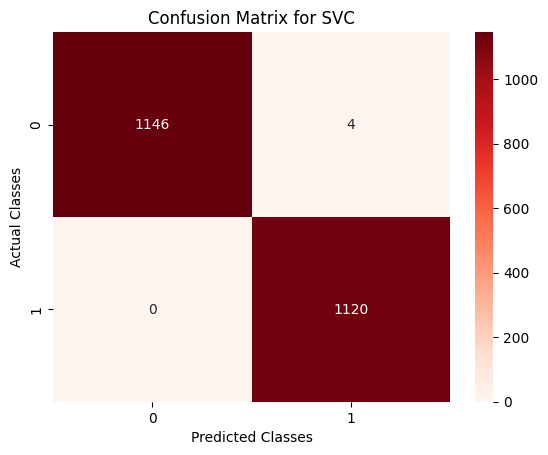

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_remaining, svc_pred_val)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Classes')
plt.ylabel('Actual Classes')
plt.title('Confusion Matrix for SVC')
plt.show()

**Evaluation on test set**

In [ ]:
file_path_test = '/content/gdrive/MyDrive/CICIoT2023_DATASET/All-forty-files/first20/part-00019-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv'
# file_path_test = '/content/gdrive/MyDrive/CICIoT2023_DATASET/For-a-single-file/Dataset_concatenations_undersampling/dataset-1.csv'
# file_path_test = '/content/gdrive/MyDrive/CICIoT2023_DATASET/All-forty-files/combined_filtered.csv'
ts = pd.read_csv(file_path_test)

In [ ]:
targeclasses = ['DDoS-ICMP_Flood','DDoS-UDP_Flood','DDoS-TCP_Flood','DDoS-PSHACK_Flood','DDoS-SYN_Flood','DDoS-RSTFINFlood','DDoS-SynonymousIP_Flood','DDoS-ICMP_Fragmentation','DDoS-UDP_Fragmentation','DDoS-ACK_Fragmentation','DDoS-UDP_Fragmentation','DDoS-HTTP_Flood','DDoS-SlowLoris','BenignTraffic']
ts = ts[ts['label'].isin(targeclasses)]
ts['label'].value_counts()

,count
label,
DDoS-ICMP_Flood,35666
DDoS-UDP_Flood,26945
DDoS-TCP_Flood,22191
DDoS-SYN_Flood,20166
DDoS-RSTFINFlood,20085
DDoS-PSHACK_Flood,19944
DDoS-SynonymousIP_Flood,17732
BenignTraffic,5397
DDoS-ICMP_Fragmentation,2271


In [ ]:
# List of features to drop
features_to_drop = ['Min', 'Max', 'Std', 'Variance', 'Covariance', 'Weight', 'AVG', 'Magnitue', 'Radius']

# Drop the specified features
ts = ts.drop(columns=features_to_drop)

In [ ]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 173527 entries, 0 to 231062
Data columns (total 38 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   flow_duration    173527 non-null  float64
 1   Header_Length    173527 non-null  float64
 2   Protocol Type    173527 non-null  float64
 3   Duration         173527 non-null  float64
 4   Rate             173527 non-null  float64
 5   Srate            173527 non-null  float64
 6   Drate            173527 non-null  float64
 7   fin_flag_number  173527 non-null  float64
 8   syn_flag_number  173527 non-null  float64
 9   rst_flag_number  173527 non-null  float64
 10  psh_flag_number  173527 non-null  float64
 11  ack_flag_number  173527 non-null  float64
 12  ece_flag_number  173527 non-null  float64
 13  cwr_flag_number  173527 non-null  float64
 14  ack_count        173527 non-null  float64
 15  syn_count        173527 non-null  float64
 16  fin_count        173527 non-null  float64
 

In [ ]:
ts['label'] = ts['label'].apply(lambda x: 1 if x in ['BenignTraffic'] else 0)

In [ ]:
ts['label'].value_counts()

,count
label,
0,168130
1,5397


<ipython-input-164-5ef315cf1934>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=ts, palette=pal)


<Axes: xlabel='label', ylabel='count'>

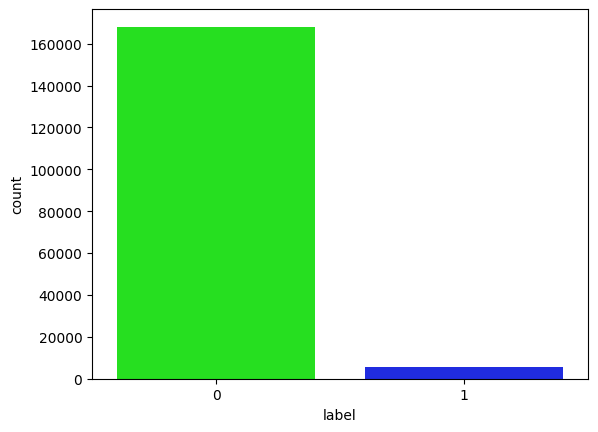

In [ ]:
pal = sns.color_palette("hsv", 2)
sns.countplot(x='label', data=ts, palette=pal)

In [ ]:
# ts.to_csv('/content/gdrive/MyDrive/CICIoT2023_DATASET/All-forty-files/Final_Folder/newVariableWL-big.csv', index=False)

In [ ]:
# Assuming the class labels are in a column named 'label'
label_column = 'label'  # Replace with the actual name of your label column

# Filter the dataset into two subsets
class_0 = ts[ts[label_column] == 0]
class_1 = ts[ts[label_column] == 1]

# Sample 50 datapoints from each class
sample_class_0 = class_0.sample(n=1600, random_state=42)
sample_class_1 = class_1.sample(n=1600, random_state=42)

# Combine the sampled datapoints into a single DataFrame
sample_df = pd.concat([sample_class_0, sample_class_1])

# If needed, reset the index
sample_df.reset_index(drop=True, inplace=True)
# sample_df = sample_df[top_features]
# sample_df = sample_df.drop(columns='label')

sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   flow_duration    3200 non-null   float64
 1   Header_Length    3200 non-null   float64
 2   Protocol Type    3200 non-null   float64
 3   Duration         3200 non-null   float64
 4   Rate             3200 non-null   float64
 5   Srate            3200 non-null   float64
 6   Drate            3200 non-null   float64
 7   fin_flag_number  3200 non-null   float64
 8   syn_flag_number  3200 non-null   float64
 9   rst_flag_number  3200 non-null   float64
 10  psh_flag_number  3200 non-null   float64
 11  ack_flag_number  3200 non-null   float64
 12  ece_flag_number  3200 non-null   float64
 13  cwr_flag_number  3200 non-null   float64
 14  ack_count        3200 non-null   float64
 15  syn_count        3200 non-null   float64
 16  fin_count        3200 non-null   float64
 17  urg_count     

In [ ]:
# ts.to_csv('/content/gdrive/MyDrive/CICIoT2023_DATASET/All-forty-files/Final_Folder/newVariableWL-big.csv', index=False)

In [ ]:
# sample_df = sample_df.drop(columns='label')

In [ ]:
sample_df.to_csv('/content/gdrive/MyDrive/CICIoT2023_DATASET/All-forty-files/Final_Folder/test_set.csv', index=False)

In [ ]:
test_set = '/content/gdrive/MyDrive/CICIoT2023_DATASET/All-forty-files/Final_Folder/test_set.csv'
tIs = pd.read_csv(test_set)

In [ ]:
X_test = tIs.drop('label', axis=1)
X_test = X_test[top_features]
X_test_scaled = scaler.transform(X_test)

y_test = tIs['label']

In [ ]:
# ts['label'].value_counts()

In [ ]:
# X_test = ts.drop('label', axis=1)
# X_test = X_test[top_features]
# X_test_scaled = scaler.transform(X_test)

# y_test = ts['label']

In [ ]:
svc_pred_test = svc_model.predict(X_test_scaled)

In [ ]:
# Print out the evaluation metrics for validation set
accuracy_svc = accuracy_score(y_test, svc_pred_test)
recall_svc = recall_score(y_test, svc_pred_test)
precision_svc = precision_score(y_test, svc_pred_test)
f1_svc = f1_score(y_test, svc_pred_test)

# Print the metrics with 5 decimal places
print()
print(f"SVC Test Accuracy: {accuracy_svc:.5f}")
print(f"SVC Test Recall: {recall_svc:.5f}")
print(f"SVC Test Precision: {precision_svc:.5f}")
print(f"SVC Test F1: {f1_svc:.5f}")
print()
print("SVC Test Classification Report:\n", classification_report(y_test, svc_pred_test))


SVC Test Accuracy: 0.99844
SVC Test Recall: 1.00000
SVC Test Precision: 0.99688
SVC Test F1: 0.99844

SVC Test Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1600
           1       1.00      1.00      1.00      1600

    accuracy                           1.00      3200
   macro avg       1.00      1.00      1.00      3200
weighted avg       1.00      1.00      1.00      3200



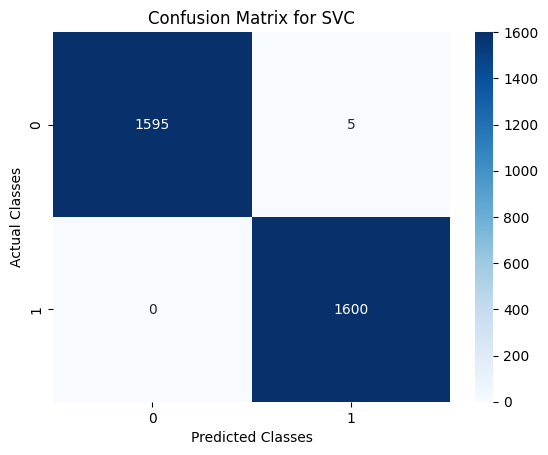

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, svc_pred_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Classes')
plt.ylabel('Actual Classes')
plt.title('Confusion Matrix for SVC')
plt.show()

**Save svc model**

In [ ]:
# save SVC Model
with open('/content/gdrive/MyDrive/CICIoT2023_DATASET/All-forty-files/Final_Folder/Models/svc_model_manual.pkl', "wb") as fs:
  pickle.dump(svc_model, fs)

**Random Forest**

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [ ]:
# from sklearn.metrics import accuracy_score, log_loss

# # Assuming X_train_scaled, X_remaining_scaled, y_train, and y_remaining are already defined

# # Define range of number of trees to evaluate
# max_trees = 100
# increment = 20

# # Initialize lists to store errors and accuracies
# train_losses = []
# val_losses = []
# train_accuracies = []
# val_accuracies = []
# n_trees_list = []

# # Train models with incremental number of trees
# for n in range(increment, max_trees + 1, increment):
#     rf_model = RandomForestClassifier(n_estimators=n, random_state=42)
#     rf_model.fit(X_train_scaled, y_train)

#     # Predict on training and validation sets
#     train_pred = rf_model.predict(X_train_scaled)
#     val_pred = rf_model.predict(X_remaining_scaled)

#     # Predict probabilities for log loss calculation
#     train_pred_proba = rf_model.predict_proba(X_train_scaled)
#     val_pred_proba = rf_model.predict_proba(X_remaining_scaled)

#     # Calculate accuracies
#     train_accuracy = accuracy_score(y_train, train_pred)
#     val_accuracy = accuracy_score(y_remaining, val_pred)

#     # Calculate log loss
#     train_loss = log_loss(y_train, train_pred_proba)
#     val_loss = log_loss(y_remaining, val_pred_proba)

#     # Store results
#     train_losses.append(train_loss)
#     val_losses.append(val_loss)
#     train_accuracies.append(train_accuracy)
#     val_accuracies.append(val_accuracy)
#     n_trees_list.append(n)

# # Plot errors against number of trees
# plt.figure(figsize=(15, 6))

# # Loss plot
# plt.subplot(1, 2, 1)
# plt.plot(n_trees_list, train_losses, label='Training Loss', marker='o', color='blue')
# plt.plot(n_trees_list, val_losses, label='Validation Loss', marker='o', color='orange')
# plt.xlabel('Number of Trees')
# plt.ylabel('Loss')
# plt.title('Loss vs. Number of Trees in RandomForest')
# plt.legend()

# # Accuracy plot
# plt.subplot(1, 2, 2)
# plt.plot(n_trees_list, train_accuracies, label='Training Accuracy', marker='o', color='blue')
# plt.plot(n_trees_list, val_accuracies, label='Validation Accuracy', marker='o', color='orange')
# plt.xlabel('Number of Trees')
# plt.ylabel('Accuracy')
# plt.title('Accuracy vs. Number of Trees in RandomForest')
# plt.legend()

# plt.tight_layout()
# plt.show()

# Define range of number of trees to evaluate
# max_trees = 100
# increment = 20

# # Initialize lists to store errors and accuracies
# train_errors = []
# val_errors = []
# train_accuracies = []
# val_accuracies = []
# n_trees_list = []

# # Train models with incremental number of trees
# for n in range(increment, max_trees + 1, increment):
#     rf_model = RandomForestClassifier(n_estimators=n, random_state=42)
#     rf_model.fit(X_train_scaled, y_train)

#     # Predict on training and validation sets
#     train_pred = rf_model.predict(X_train_scaled)
#     val_pred = rf_model.predict(X_remaining_scaled)

#     # Predict probabilities for log loss calculation
#     train_pred_proba = rf_model.predict_proba(X_train_scaled)
#     val_pred_proba = rf_model.predict_proba(X_remaining_scaled)

#     # Calculate errors and accuracies
#     train_error = 1 - accuracy_score(y_train, train_pred)
#     val_error = 1 - accuracy_score(y_remaining, val_pred)

#     train_accuracy = accuracy_score(y_train, train_pred)
#     val_accuracy = accuracy_score(y_remaining, val_pred)

#     # Calculate log loss
#     train_loss = log_loss(y_train, train_pred_proba)
#     val_loss = log_loss(y_remaining, val_pred_proba)

#     # Store results
#     train_errors.append(train_loss)
#     val_errors.append(val_loss)
#     train_accuracies.append(train_accuracy)
#     val_accuracies.append(val_accuracy)
#     n_trees_list.append(n)


# # Plot errors against number of trees
# plt.figure(figsize=(15, 6))  # Increase the width of the plot

# plt.subplot(1, 2, 1)
# plt.plot(n_trees_list, train_errors, label='Training Loss', marker='o')
# plt.plot(n_trees_list, val_errors, label='Validation Loss', marker='o')
# plt.xlabel('Number of Trees')
# plt.ylabel('Loss')
# plt.title('Loss vs. Number of Trees in RandomForest')
# plt.legend()
# plt.grid(True)
# plt.xticks(n_trees_list)  # Ensure all x-ticks are shown

# plt.subplot(1, 2, 2)
# plt.plot(n_trees_list, train_accuracies, label='Training Accuracy', marker='o')
# plt.plot(n_trees_list, val_accuracies, label='Validation Accuracy', marker='o')
# plt.xlabel('Number of Trees')
# plt.ylabel('Accuracy')
# plt.title('Accuracy vs. Number of Trees in RandomForest')
# plt.legend()
# plt.grid(True)
# plt.xticks(n_trees_list)  # Ensure all x-ticks are shown

# plt.tight_layout()
# plt.show()


**Evaluation on validation set**

In [ ]:
# Evaluate the models on the validation set
rf_pred_val = rf_model.predict(X_remaining_scaled)

In [ ]:
# Print out the evaluation metrics for validation set
accuracy_r = accuracy_score(y_remaining, rf_pred_val)
recall_r = recall_score(y_remaining, rf_pred_val)
precision_r = precision_score(y_remaining, rf_pred_val)
f1_r = f1_score(y_remaining, rf_pred_val)

# Print the metrics with 5 decimal places
print()
print(f"RF Validation Accuracy: {accuracy_r:.5f}")
print(f"RF Validation Recall: {recall_r:.5f}")
print(f"RF Validation Precision: {precision_r:.5f}")
print(f"RF Validation F1: {f1_r:.5f}")

print()
print("RF Validation Classification Report:\n", classification_report(y_remaining, rf_pred_val))


RF Validation Accuracy: 0.99912
RF Validation Recall: 1.00000
RF Validation Precision: 0.99822
RF Validation F1: 0.99911

RF Validation Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1150
           1       1.00      1.00      1.00      1120

    accuracy                           1.00      2270
   macro avg       1.00      1.00      1.00      2270
weighted avg       1.00      1.00      1.00      2270



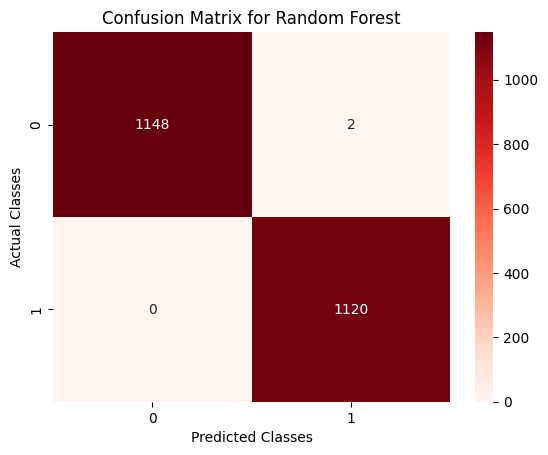

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_remaining, rf_pred_val)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Classes')
plt.ylabel('Actual Classes')
plt.title('Confusion Matrix for Random Forest')
plt.show()

**Evaluation on test set**

In [ ]:
rf_pred_test = rf_model.predict(X_test_scaled)

In [ ]:
# Print out the evaluation metrics for test set
accuracy_rf = accuracy_score(y_test, rf_pred_test)
precision_rf = precision_score(y_test, rf_pred_test)
recall_rf = recall_score(y_test, rf_pred_test)
f1_rf = f1_score(y_test, rf_pred_test)

print()
# Print the metrics with 5 decimal places
print(f"RF Test Accuracy: {accuracy_rf:.5f}")
print(f"RF Test Recall: {recall_rf:.5f}")
print(f"RF Test Precision: {precision_rf:.5f}")
print(f"RF Test F1: {f1_rf:.5f}")
print()

print("RF Test Classification Report:\n", classification_report(y_test, rf_pred_test))


RF Test Accuracy: 0.99906
RF Test Recall: 1.00000
RF Test Precision: 0.99813
RF Test F1: 0.99906

RF Test Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1600
           1       1.00      1.00      1.00      1600

    accuracy                           1.00      3200
   macro avg       1.00      1.00      1.00      3200
weighted avg       1.00      1.00      1.00      3200



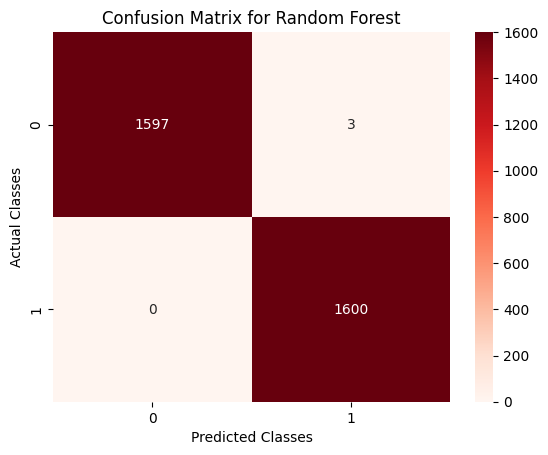

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, rf_pred_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Classes')
plt.ylabel('Actual Classes')
plt.title('Confusion Matrix for Random Forest')
plt.show()

In [ ]:
# save RF Model
with open('/content/gdrive/MyDrive/CICIoT2023_DATASET/All-forty-files/Final_Folder/Models/rf_model_manual.pkl', "wb") as file:
  pickle.dump(rf_model, file)

In [ ]:
# Extract TN, FP, FN, TP from the confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()

# Display TN, FP, FN, TP
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

True Negatives (TN): 1597
False Positives (FP): 3
False Negatives (FN): 0
True Positives (TP): 1600


In [ ]:
# pickle.dump(model , open('heart-disease-model.pk1' , 'wb'))

In [ ]:
# import sklearn
# print(sklearn.__version__)

In [ ]:
# print(np.__version__)

In [ ]:
# pip list

In [ ]:
# df_balanced[scaler.get_feature_names_out()]

**AUC - ROC**

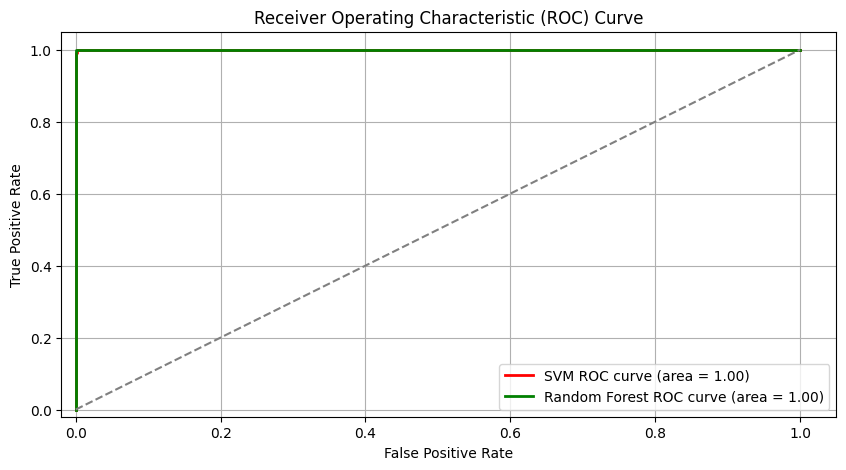

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Predict probabilities for the validation set using SVM
svc_val_pred_proba = svc_model.predict_proba(X_remaining_scaled)[:, 1]

# Predict probabilities for the validation set using Random Forest
rf_val_pred_proba = rf_model.predict_proba(X_remaining_scaled)[:, 1]

# Calculate ROC curve and AUC for SVM
fpr_svc, tpr_svc, _ = roc_curve(y_remaining, svc_val_pred_proba)
roc_auc_svc = auc(fpr_svc, tpr_svc)

# Calculate ROC curve and AUC for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_remaining, rf_val_pred_proba)
roc_auc_rf = auc(fpr_rf, tpr_rf)


# Plot ROC curves
plt.figure(figsize=(10, 5))
plt.plot(fpr_svc, tpr_svc, color='red', lw=2, label=f'SVM ROC curve (area = {roc_auc_svc:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest ROC curve (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for no-skill classifier

plt.xlim([-0.02, 1.05])
plt.ylim([-0.02, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()